**Import Numpy, Pandas and Seaborn**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read Salaries.csv as a dataframe called "sal"**

In [3]:
sal = pd.read_csv("../input/sf-salaries/Salaries.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Check the head of the DataFrame**

In [4]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


**What is the average TotalPay?**

In [6]:
sal["TotalPay"].mean()

74768.32197169267

**What is the highest amount of TotalPay in the dataset?**

In [7]:
sal["TotalPay"].max()

567595.43

**What is the job title of "JOSEPH DRISCOLL"?**

In [8]:
sal[sal["EmployeeName"]=="JOSEPH DRISCOLL"]["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

**How much does JOSEPH DRISCOLL make (including benefits)?**

In [9]:
sal[sal["EmployeeName"]=="JOSEPH DRISCOLL"]["TotalPayBenefits"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [10]:
sal[sal["TotalPayBenefits"]==sal.max(numeric_only=True)["TotalPayBenefits"]]["EmployeeName"]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)?**

In [11]:
sal[sal["TotalPayBenefits"]==sal.min(numeric_only=True)["TotalPayBenefits"]]["EmployeeName"]

148653    Joe Lopez
Name: EmployeeName, dtype: object

**What was the average (mean) TotalPay of all employees per year? (2011-2014)?**

In [12]:
sal.groupby(["Year"]).mean()["TotalPay"]

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

**How many unique job titles are there?**

In [13]:
sal.nunique()["JobTitle"]

2159

**What are the top 5 most common jobs?**

In [14]:
sal["JobTitle"].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013)**

In [15]:
sum(sal[sal["Year"]==2013]["JobTitle"].value_counts()==1)

202

**How many people have the word "Chief" in their job title?**

In [16]:
def chiefString(x):
    if "chief" in x.lower():
        return True
    else:
        return False

In [17]:
sum(sal["JobTitle"].apply(lambda x: chiefString(x)))

627

**Is there a correlation between length of the Job Title string and Salary?**

In [18]:
sal['TitleLength'] = sal['JobTitle'].apply(len)

In [19]:
sal[['TitleLength','TotalPayBenefits']].corr() # No correlation.

,TitleLength,TotalPayBenefits
TitleLength,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


**Total Pay Benefits histogram**

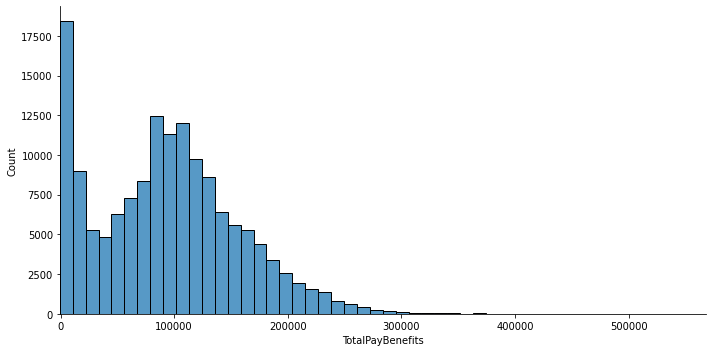

In [20]:
sns.displot(sal["TotalPayBenefits"], kde=False, bins = 50, aspect=2)
plt.margins(x=0)

**Boxplot analysis per year**

<AxesSubplot:xlabel='Year', ylabel='TotalPayBenefits'>

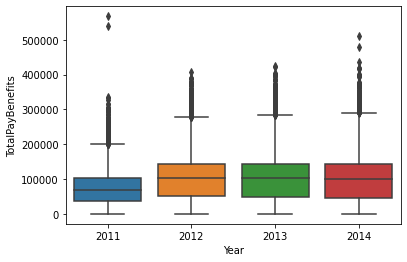

In [21]:
sns.boxplot(x=sal["Year"],y=sal["TotalPayBenefits"])

**Conclusion**
* Most of the salaries are at about 7000.00
* Since 2012 there has been no considerable increase in salary, although some employees receive salaries well above the average